# Worksheet 14

Name: Victor Verma
UID: U86967149

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
- P(Attribute B = Divorced | Class = Yes)
- P(Attribute C = High | Class = No)
- P(Attribute C = Mid | Class = Yes)

- P(A = Yes | Class = No) = 3/7
- P(B = Divorced | Class = Yes) = 1/3
- P(C = High | Class = No) = 3/7
- P(C = Mid | Class = Yes) = 1

b) Classify the following unseen records:

- (Yes, Married, Mid)
- (No, Divorced, High)
- (No, Single, High)
- (No, Divorced, Low)

1. 
- P(Yes, Married, Mid | C = Yes) = P(Yes | C = Yes) * P(Married | C = Yes) * P(Mid | C = Yes) = 0 * ... = 0.
- P(Yes, Married, Mid | C = No) = P(Yes | C = No) * P(Married | C = No) * P(Mid | C = No) = 3/7 * 4/7 * 1/7 > 0.
- The predicted class is No.
2. 
- P(No, Divorced, High | C = Yes) = P(No | C = Yes) * P(Divorced | C = Yes) *  P(High | C = Yes) = 1 * 1/3 * 0 = 0. 
- P(No, Divorced, High | C = No) = P(No | C = No) * P(Divorced | C = No) *  P(High | C = No) = 4/7 * 1/7 * 3/7 > 0.
- The predicted class is No.
3. 
- P(No, Single, High | C = Yes) = P(No | C = Yes) * P(Single | C = Yes) * P(High | C = Yes) = 1 * 2/3 * 0 = 0.
- P(No, Single, High | C = No) = P(No | C = No) * P(Single | C = No) * P(High | C = No) = 4/7 * 2/7 * 3/7 > 0.
- The predicted class is No.
4.
- P(No, Divorced, Low | C = Yes) = P(No | C = Yes) * P(Divorced | C = Yes) * P(Low | C = Yes) = 1 * 1/3 * 0 = 0.
- P(No, Divorced, Low | C = No) = P(No | C = No) * P(Divorced | C = No) * P(Low | C = No) = 4/7 * 1/7 * 3/7 > 0.
- The predicted class is No.


### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [227]:
actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted):
    matrix = [[0 for _ in range(2)] for _ in range(2)]
    for index, value in enumerate(actual):
        if value == "Yes":
            if predicted[index] == "Yes":
                matrix[0][0] += 1
            else:
                matrix[0][1] += 1
        else:
            if predicted[index] == "Yes":
                matrix[1][0] += 1
            else:
                matrix[1][1] += 1
    return matrix

print(confusion_matrix(actual_class, predicted_class))

[[2, 1], [3, 4]]


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

(2 * -1) + (1 * 5) + (3 * 10) + (4 * 0) = -2 + 5 + 30 + 0 = 33.

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [228]:
actual_values = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_values = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]
cost_matrix = [[-1, 5], [10, 0]]

def cost(confusion, cost_matrix):
    total_cost = 0
    for i in range(len(confusion)):
        for j in range(len(confusion[0])):
            total_cost += (confusion[i][j] * cost_matrix[i][j])
    return total_cost    

confusion = confusion_matrix(actual_values, predicted_values)
print(cost(confusion, cost_matrix))

33


d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [229]:
def accuracy(confusion):
    total = sum([sum(row) for row in confusion])
    correct = confusion[0][0] + confusion[1][1]
    return correct / total

def precision(confusion):
    return confusion[0][0] / (confusion[0][0] + confusion[1][1])

def recall(confusion):
    return confusion[0][0] / (confusion[0][0] + confusion[0][1])

def f_measure(confusion):
    r = recall(confusion)
    p = precision(confusion)
    return 2 * r * p / (r + p)

confusion = confusion_matrix(actual_values, predicted_values)
print(accuracy(confusion))
print(precision(confusion))
print(recall(confusion))
print(f_measure(confusion))

0.6
0.3333333333333333
0.6666666666666666
0.4444444444444444


## Challenge (Midterm prep part 2)

In this exercise you will update your submission to the titanic competition.

a) First let's add new numerical features / columns to the datasets that might be related to the survival of individuals.

- `has_cabin` should have a value of 0 if the `cabin` feature is `nan` and 1 otherwise
- `family_members` should have the total number of family members (by combining `SibSp` and `Parch`)
- `title_type`: from the title extracted from the name, we will categorize it into 2 types: `common` for titles that many passengers have, `rare` for titles that few passengers have. Map `common` to 1 and `rare` to 0. Describe what threshold you used to define `common` and `rare` titles and how you found it.
- `fare_type`: using Kmeans clustering on the fare column, find an appropriate number of clusters / groups of similar fares. Using the clusters you created, `fare_price` should be an ordinal variable that represents the expensiveness of the fare. For example if you split fare into 3 clusters ( 0 - 15, 15 - 40, and 40+ ) then the `fare_price` value should be `0` for `fare` values 0 - 15, `1` for 15 - 40, and `2` for 40+.
- Create an addition two numerical features of your invention that you think could be relevant to the survival of individuals.

Note: The features must be numerical because the sklearn `DecisionTreeClassifier` can only take on numerical features.

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

training_data = pd.read_csv("./train.csv")
testing_data = pd.read_csv("./test.csv")

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
fares = np.array(training_data["Fare"]).reshape(-1, 1)
kmeans.fit(fares)

def clean_data(data):
    # fix features
    data["Age"] = data["Age"].fillna(data["Age"].median())
    data["Embarked"] = data["Embarked"].fillna("S")
    data.replace(
        {"Sex": {"male": 1, "female": 0}, "Embarked": {"S": 1, "C": 2, "Q": 3}},
        inplace=True,
    )
    data["Fare"] = data["Fare"].fillna(data["Fare"].median())

    # new features
    data["has_cabin"] = data.apply(has_cabin, axis=1)
    data["family_members"] = data["SibSp"] + data["Parch"]
    data["title_type"] = data.apply(is_common_title, axis=1)
    data["fare_price"] = data.apply(fare_clustering, axis=1)

    # custom features
    data["woman_or_child"] = data.apply(is_woman_or_child, axis=1)
    data["age*family"] = data["Age"] * data["family_members"]

    data = data.drop(columns=["Name", "Ticket", "Cabin"])
    return data

def has_cabin(row):
    if pd.isna(row["Cabin"]):
        return 0
    else:
        return 1
    
def is_common_title(row):
    common_titles = ["Mr", "Miss", "Mrs", "Master"]
    title = row["Name"].split(".")[0].split(", ")[1]
    if title in common_titles:
        return 1
    else:
        return 0
    
def fare_clustering(row):
    return kmeans.predict(np.array(row["Fare"]).reshape(-1, 1))[0]

def is_woman_or_child(row):
    if row["Sex"] == 0 or row["Age"] < 18:
        return 1
    else:
        return 0
    
cleaned_training_data = clean_data(training_data)
print(cleaned_training_data.head())

/var/folders/wc/t5ng__5s0qd78vh29lv6jpkr0000gn/T/ipykernel_67272/1131459173.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    1  22.0      1      0   7.2500         1   
1            2         1       1    0  38.0      1      0  71.2833         2   
2            3         1       3    0  26.0      0      0   7.9250         1   
3            4         1       1    0  35.0      1      0  53.1000         1   
4            5         0       3    1  35.0      0      0   8.0500         1   

   has_cabin  family_members  title_type  fare_price  woman_or_child  \
0          0               1           1           0               0   
1          1               1           1           3               1   
2          0               0           1           0               1   
3          1               1           1           3               1   
4          0               0           1           0               0   

   age*family  
0        22.0  
1        38.0  
2         0.0  
3        35.0  
4     

In [231]:
def common_titles(data):
    titles = data["Name"].apply(lambda x: x.split(".")[0].split(", ")[1])
    return titles.value_counts()
 
print(common_titles(training_data))

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


I found value counts of each title in the training data in the above code box. From the value counts, it makes sense to define the common titles as Mr, Miss, Mrs, and Master, and the rare titles as everything else.

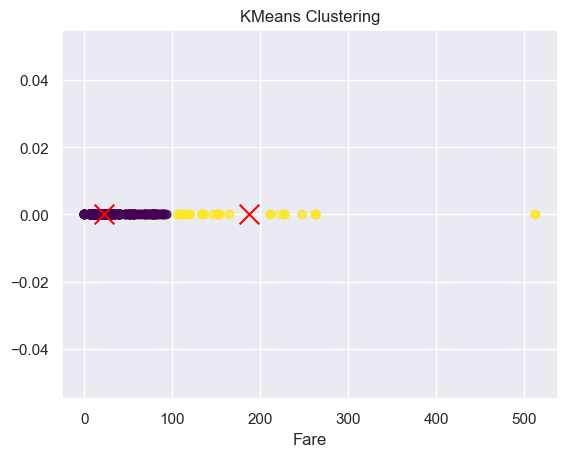

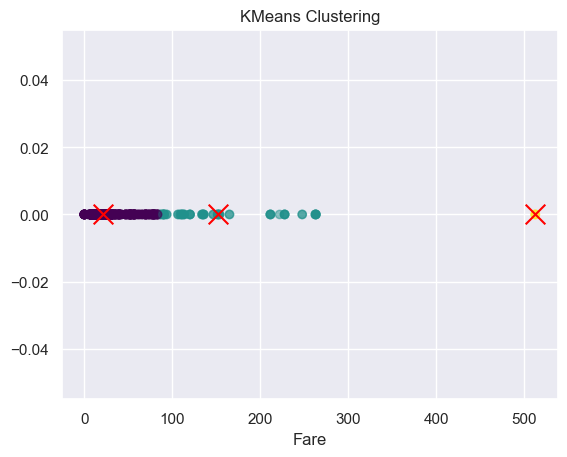

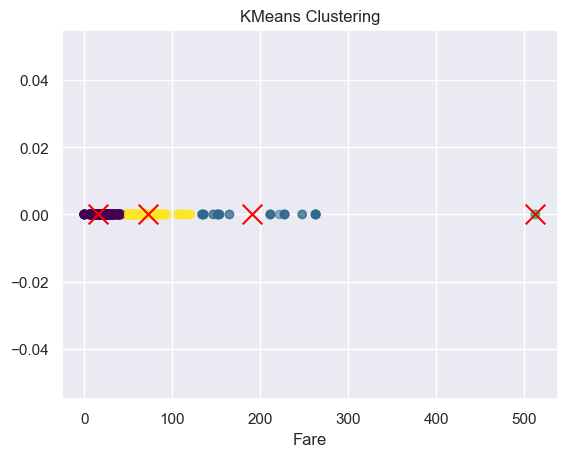

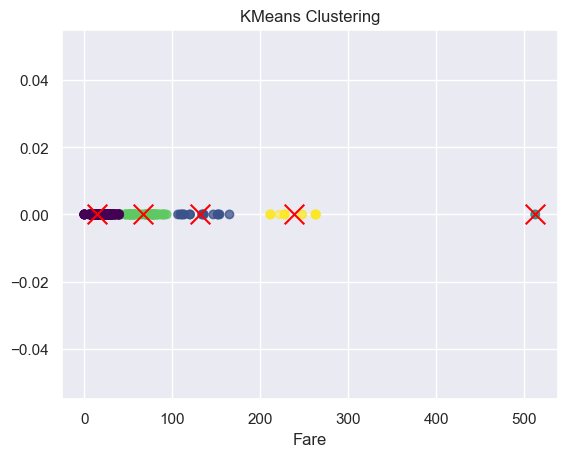

In [241]:
for n in range(2, 6):
    kmeans = means = KMeans(n_clusters=n, init="k-means++", random_state=0)
    fares = np.array(cleaned_training_data["Fare"]).reshape(-1, 1)
    kmeans.fit(fares)

    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.scatter(fares, [0]*len(fares), c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.scatter(centroids, [0]*len(centroids), marker='x', c='red', s=200)
    plt.title('KMeans Clustering')
    plt.xlabel('Fare')
    plt.show()

Based on the above graphs, I am choosing n = 5 clusters for the fare_price clustering.

b) Using a method covered in class, tune the parameters of a decision tree model on the titanic dataset (containing all numerical features including the ones you added above). Evaluate this model locally and report it's performance.

Note: make sure you are not tuning your parameters on the same dataset you are using to evaluate the model. Also explain how you know you are not overfitting to the training set.

In [242]:
from sklearn.model_selection import train_test_split

training_data = pd.read_csv("./train.csv")
testing_data = pd.read_csv("./test.csv")
kmeans = means = KMeans(n_clusters=5, init="k-means++", random_state=0)
fares = np.array(training_data["Fare"]).reshape(-1, 1)
kmeans.fit(fares)

cleaned_training_data = clean_data(training_data)
cleaned_training_data_features = cleaned_training_data.drop(columns=["Survived"])
cleaned_training_data_target = cleaned_training_data["Survived"]
cleaned_testing_data = clean_data(testing_data)

/var/folders/wc/t5ng__5s0qd78vh29lv6jpkr0000gn/T/ipykernel_67272/1131459173.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(
/var/folders/wc/t5ng__5s0qd78vh29lv6jpkr0000gn/T/ipykernel_67272/1131459173.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(


In [243]:
# Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def train_tree(X_train, y_train):
    tree = DecisionTreeClassifier(random_state=0)
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
    grid_search = GridSearchCV(tree, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    best_tree = DecisionTreeClassifier(**best_params, random_state=0)
    best_tree.fit(X_train, y_train)

    return best_tree

X_train, X_test, y_train, y_test = train_test_split(cleaned_training_data_features, cleaned_training_data_target, 
                                                        test_size=0.2, random_state=0)


best_tree = train_tree(X_train, y_train)
train_predictions = best_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Train Accuracy: {train_accuracy}")
tree_accuracy = best_tree.score(X_test, y_test)
print(f"Accuracy: {tree_accuracy}")

tree_predictions = best_tree.predict(cleaned_testing_data)
testing_data["Survived"] = pd.Series(tree_predictions, index=testing_data.index)
submission = testing_data[["PassengerId", "Survived"]]
submission.to_csv("tree_titanic_survival_predictions.csv", encoding="utf-8", index=False)


Train Accuracy: 0.8342696629213483
Accuracy: 0.8212290502793296


I know that the model is not overfitting to the training data because there is not a significant difference in performance between using the model on the training set and the testing set.

c) Try reducing the dimension of the dataset and create a Naive Bayes model. Evaluate this model.

In [244]:
# Naive Bayes Classifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def train_naive_bayes(X_train, y_train):
    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(X_train, y_train)

    return naive_bayes_classifier

pca = PCA(n_components=14)
reduced_X = pca.fit_transform(cleaned_training_data_features)
X_train, X_test, y_train, y_test = train_test_split(reduced_X, cleaned_training_data_target, test_size=0.2, random_state=0)

naive_bayes_classifier = train_naive_bayes(X_train, y_train)
bayes_training_predictions = naive_bayes_classifier.predict(X_test)
bayes_accuracy = accuracy_score(y_test, bayes_training_predictions)
print(f"Accuracy: {bayes_accuracy}")

bayes_predictions = naive_bayes_classifier.predict(cleaned_testing_data)
testing_data["Survived"] = pd.Series(bayes_predictions, index=testing_data.index)
submission = testing_data[["PassengerId", "Survived"]]
submission.to_csv("naive_bayes_titanic_survival_predictions.csv", encoding="utf-8", index=False)


Accuracy: 0.7374301675977654


/usr/local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


d) Create an ensemble classifier using a combination of KNN, Decision Trees, and Naive Bayes models. Evaluate this classifier.

In [245]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

def find_optimal_k(X_train, X_test, y_train, y_test):
    train_accuracies = []
    test_accuracies = []

    k_values = range(1, 51)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_pred = knn.predict(X_train)
        test_pred = knn.predict(X_test)

        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    plt.plot(k_values, train_accuracies, label="Training Accuracy")
    plt.plot(k_values, test_accuracies, label="Testing Accuracy")
    plt.xlabel("Number of Neighbors (K)")
    plt.ylabel("Accuracy")
    plt.title("KNN Accuracy")
    plt.show()

def train_knn(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)

    return knn

X_train, X_test, y_train, y_test = train_test_split(cleaned_training_data_features, cleaned_training_data_target, 
                                                        test_size=0.2, random_state=0)

# find_optimal_k(X_train, X_test, y_train, y_test)  # optimal k is about 11
knn = train_knn(X_train, y_train)
knn_training_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_training_predictions)

knn_predictions = knn.predict(cleaned_testing_data)
testing_data["Survived"] = pd.Series(knn_predictions, index=testing_data.index)
submission = testing_data[["PassengerId", "Survived"]]
submission.to_csv("knn_titanic_survival_predictions.csv", encoding="utf-8", index=False)

print(f"Accuracy: {knn_accuracy}")

Accuracy: 0.7150837988826816


In [246]:
# Ensemble Classifier
def ensemble(data):
    X_train, X_test, y_train, y_test = train_test_split(cleaned_training_data_features, cleaned_training_data_target, 
                                                        test_size=0.2, random_state=0)
    best_tree = train_tree(X_train, y_train)
    tree_accuracy = best_tree.score(X_test, y_test)
    knn = train_knn(X_train, y_train)
    knn_training_predictions = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_training_predictions)

    pca = PCA(n_components=13)
    reduced_X = pca.fit_transform(cleaned_training_data_features)
    X_train, X_test, y_train, y_test = train_test_split(reduced_X, cleaned_training_data_target, test_size=0.2, random_state=0)
    naive_bayes_classifier = train_naive_bayes(X_train, y_train)
    bayes_training_predictions = naive_bayes_classifier.predict(X_test)
    bayes_accuracy = accuracy_score(y_test, bayes_training_predictions)
    
    accuracy = {
        "tree_accuracy": tree_accuracy,
        "knn_accuracy": knn_accuracy,
        "bayes_accuracy": bayes_accuracy
    }

    learner = {
        "tree_accuracy": best_tree,
        "knn_accuracy": knn,
        "bayes_accuracy": naive_bayes_classifier
    }

    max_accuracy_learner = max(accuracy, key=accuracy.get)
    best_model = learner[max_accuracy_learner]

    emsemble_predictions = best_model.predict(data)
    testing_data["Survived"] = pd.Series(emsemble_predictions, index=testing_data.index)
    submission = testing_data[["PassengerId", "Survived"]]
    submission.to_csv("ensemble_titanic_survival_predictions.csv", encoding="utf-8", index=False)

    return best_model, emsemble_predictions

print(ensemble(cleaned_testing_data))

(DecisionTreeClassifier(max_depth=3, random_state=0), array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 

e) Update your kaggle submission using the best model you created (best model means the one that performed the best on your local evaluation)

Username: victorverma

## Some useful code for the midterm

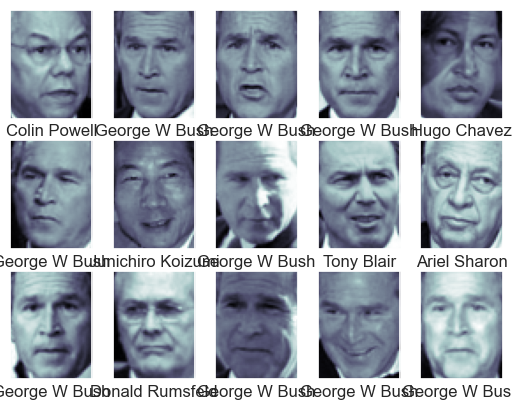

KeyboardInterrupt: 

In [238]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))